# Análisis de Datos usando Pandas - Netflix

Este proyecto se centra en el análisis de datos utilizando la biblioteca Pandas junto con otras herramientas científicas de Python como NumPy, Matplotlib y Seaborn. El objetivo principal es realizar un análisis exploratorio de un conjunto de datos de títulos de Netflix, identificando patrones y tendencias relevantes.

## 1. Importación y limpieza de datos.

Se comienza importando las librerías necesarias y el dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

df = pd.read_csv("netflix_titles.csv")

Verificamos los datos.

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


Veamos la información de la tabla y preparemos los datos para el análisis eliminando los valores faltantes y gestionando datos inconsistentes.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [14]:
# Vemos si hay datos duplicados
df.duplicated().sum()

0

In [2]:
# Veamos cuántos datos null hay en cada columna
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [3]:
# Reemplazamos algunos datos con valores genéricos y eliminamos algunas filas
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df.dropna(subset=['date_added','rating'], inplace = True)

In [4]:
# Comprobamos que ya no hay valores null
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

---
## Análisis exploratorio de datos (EDA)

### ¿Cuantos tipos de programas ofrece la plataforma Netflix y cuántos de cada tipo?

In [64]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

Se observa que hay 5377 películas y 2400 series de TV en la plataforma de Netflix.

### ¿Cómo están distribuidos los ratings de los programas en la plataforma?

In [6]:
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

### ¿El Perú tiene alguna producción en la plataforma Netflix?

In [7]:
df[df['country'] == 'Peru'][['title','director','release_year']]

,title,director,release_year
604,Asu Mare 2,Ricardo Maldonado,2015
2845,How to Get Over a Breakup,"Joanna Lombardi, Bruno Ascenzo",2018
4732,Pacificum: Return to the Ocean,"Mariana Tschudi, Héctor Gálvez",2017
5634,Sinister Circle,Dorian Fernández-Moris,2017


### ¿Cuál es la película más antigua en la plataforma Netflix?

In [8]:
df[df['type'] == 'Movie'].sort_values(by='release_year').iloc[0,:][['title','release_year']]

title           The Battle of Midway
release_year                    1942
Name: 6117, dtype: object

### ¿Cuál es la serie de TV más antigua en la plataforma Netflix?

In [10]:
df[df['type'] == 'TV Show'].sort_values(by='release_year').iloc[0,:][['title','release_year']]

title           Pioneers: First Women Filmmakers*
release_year                                 1925
Name: 4867, dtype: object

### Liste las 10 series con el mayor número de temporadas en la plataforma Netflix?

In [11]:
df.insert(1,"num_seasons",df['duration'].apply(lambda x: int(x.split()[0])))
df[df['type'] == 'TV Show'].sort_values(by='num_seasons', ascending=False).head(10)[['type','title','duration','num_seasons']]

,type,title,duration,num_seasons
2538,TV Show,Grey's Anatomy,16 Seasons,16
5912,TV Show,Supernatural,15 Seasons,15
4438,TV Show,NCIS,15 Seasons,15
1471,TV Show,COMEDIANS of the world,13 Seasons,13
1537,TV Show,Criminal Minds,12 Seasons,12
7169,TV Show,Trailer Park Boys,12 Seasons,12
2678,TV Show,Heartland,11 Seasons,11
1300,TV Show,Cheers,11 Seasons,11
1597,TV Show,Danger Mouse: Classic Collection,10 Seasons,10
5538,TV Show,Shameless (U.S.),10 Seasons,10


### ¿Qué programas de Reality TV tiene la platforma que sean producidos en Canadá?

In [12]:
df[(df['country'] == 'Canada') & (df['listed_in'] == 'Reality TV')][['title','listed_in']]

,title,listed_in
2738,Highway Thru Hell,Reality TV
3619,License to Drill: Louisiana,Reality TV


### ¿Tiene la plataforma Netflix alguna película protagonizada por Al Pacino?

In [13]:
df_aux_1 = df.dropna(subset=['cast'], axis=0)
df_aux_1[df_aux_1['cast'].str.startswith('Al Pacino')][['title','cast']]

,title,cast
1823,Donnie Brasco,"Al Pacino, Johnny Depp, Michael Madsen, Bruno ..."
2596,Hangman,"Al Pacino, Karl Urban, Brittany Snow, Joe Ande..."
3902,Manglehorn,"Al Pacino, Holly Hunter, Harmony Korine, Chris..."


---
## Análisis Gráfico

Se muestra un gráfico de barras con los 10 paises con más producciones en la plataforma de Netflix, ordenados de forma descendente por número de producciones

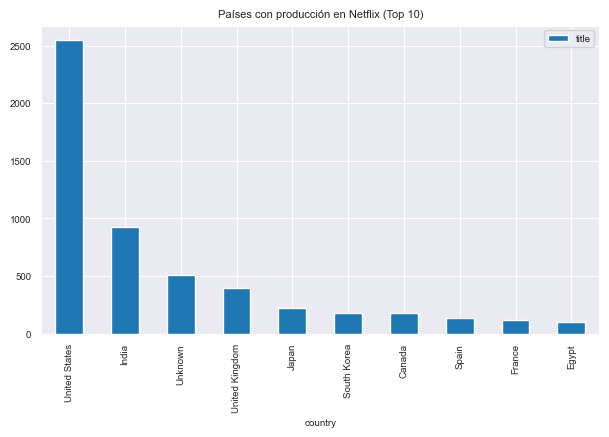

In [14]:
df_result = df[['country','title']].groupby(by='country').agg({'title': 'count'}).sort_values(by='title',ascending=False).head(10)
fig, ax = plt.subplots(figsize=(7.2,4))
df_result.plot(kind='bar',ax=ax)
ax.set_title("Países con producción en Netflix (Top 10)", fontsize=8)
ax.set_xlabel("country", fontsize=7)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.legend(fontsize=7)
plt.show()

### Gráfico con las distribuciones por raiting de la peliculas y de las series

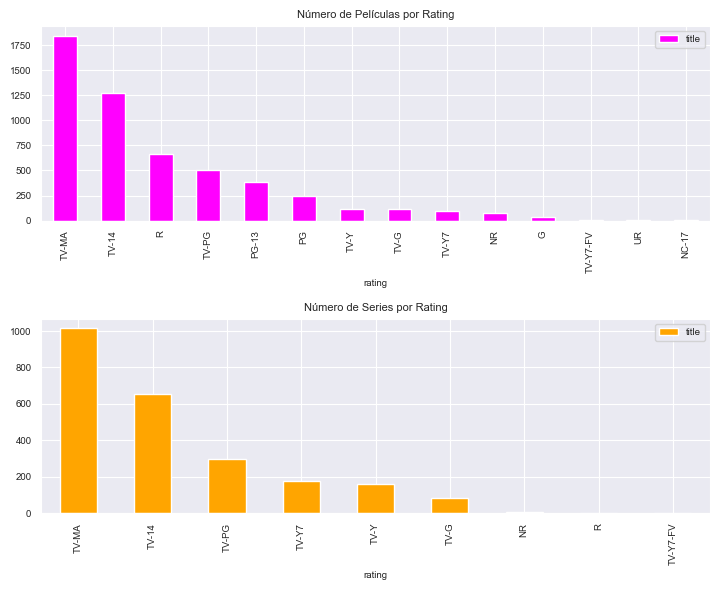

In [15]:
df_result = df[['type','title','rating']].groupby(by=['type','rating']).agg({'title': 'count'})
fig, (ax1, ax2) = plt.subplots(figsize=(7.3,6), nrows=2, ncols=1)

df_result.loc['Movie'].sort_values(by='title',ascending=False).plot.bar(ax=ax1,color='magenta')
df_result.loc['TV Show'].sort_values(by='title',ascending=False).plot.bar(ax=ax2,color='orange')

ax1.set_title("Número de Películas por Rating", fontsize=8)
ax2.set_title("Número de Series por Rating", fontsize=8)
ax1.set_xlabel("rating", fontsize=7)
ax2.set_xlabel("rating", fontsize=7)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax2.tick_params(axis='both', which='major', labelsize=7)
ax1.legend(fontsize=7)
ax2.legend(fontsize=7)

fig.tight_layout()
plt.show()

### Gráfico de barras con el número de producciones por año de lanzamiento en la plataforma

Se ordena por año de forma ascendente y se utiliza una escala logaritmica para el eje y.

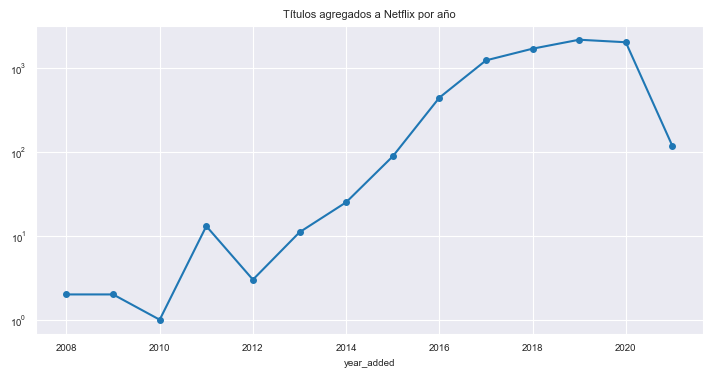

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['Year_added'] = df['date_added'].dt.strftime('%Y')
df_result = df[['Year_added','title']].groupby(by='Year_added').agg({'title':'count'}).sort_values(by='Year_added')#.plot(marker='.',markersize=8)

fig, ax = plt.subplots(figsize=(8.6,4))
df_result.plot(ax=ax, marker='.',markersize=8)
ax.set_title("Títulos agregados a Netflix por año", fontsize=8)
ax.set_xlabel("year_added", fontsize=7)
ax.tick_params(axis='both', which='major', labelsize=7)
plt.yscale('log')
ax.legend().remove()
plt.show()

### ¿Cómo están distribuidas las producciones de series y peliculas en los 10 paises con más producciones?

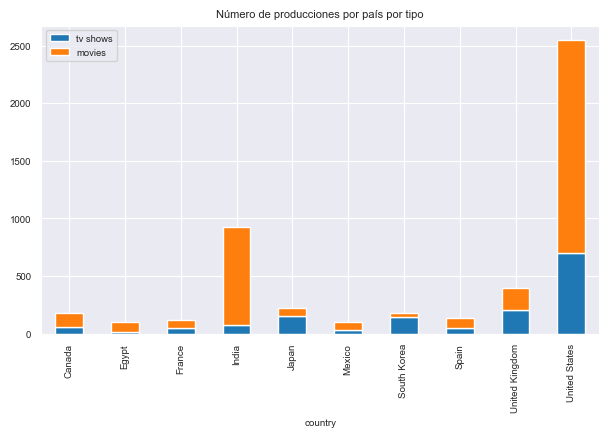

In [32]:
df_aux = df[['country','type']].groupby(by=['country']).agg({'type':'count'}).sort_values(by='type', ascending = False).drop('Unknown').head(10)
top_paises = list(df_aux.index)

df_result = df[df['country'].isin(top_paises)].groupby(by=['country','type']).agg({'show_id':'count'}).unstack()
df_result = df_result.reindex(columns=['TV Show', 'Movie'], level=1)

fig, ax = plt.subplots(figsize=(7.2,4))
df_result.plot(kind='bar',ax=ax, y=['show_id'], stacked=True)
ax.set_title("Número de producciones por país por tipo", fontsize=8)
ax.set_xlabel("country", fontsize=7)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.legend(['tv shows','movies'], fontsize=6.8)
plt.show()